---
# Introducing `LazyPlot`

# .. tip:: this is a test whether we can insert Tip-blocks in a notebook

Sometimes it's a bit cumbersome to go through all matplotlib motions such as intiating the figure, adding labels, and such when you just want to quickly visualize your data. This class is intended to do just that. Make the same plots in a whole lot less lines. I tried to include as many functionalities as possible without overcomplicating the process too much. Below are a few examples of how to use this class.

In [1]:
%reload_ext autoreload
%autoreload 2

In [5]:
# imports
from linescanning import glm, utils
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')
opj = os.path.join


Create random timeseries with `linescanning.utils.random_timeseries`

In [26]:
print(utils.random_timeseries.__doc__)

random_timeseries

    Create a random timecourse by multiplying an intercept with a random Gaussian distribution.

    Parameters
    ----------
    intercept: float
        starting point of timecourse
    volatility: float
        this factor is multiplied with the Gaussian distribution before multiplied with the intercept
    nr: int
        length of timecourse 

    Returns
    ----------
    numpy.ndarray
        array of length `nr`

    Example
    ----------
    >>> from linescanning import utils
    >>> ts = utils.random_timeseries(1.2, 0.5, 100)

    Notes
    ----------
    Source: https://stackoverflow.com/questions/67977231/how-to-generate-random-time-series-data-with-noise-in-python-3
    


Plot them regularly

(100,)


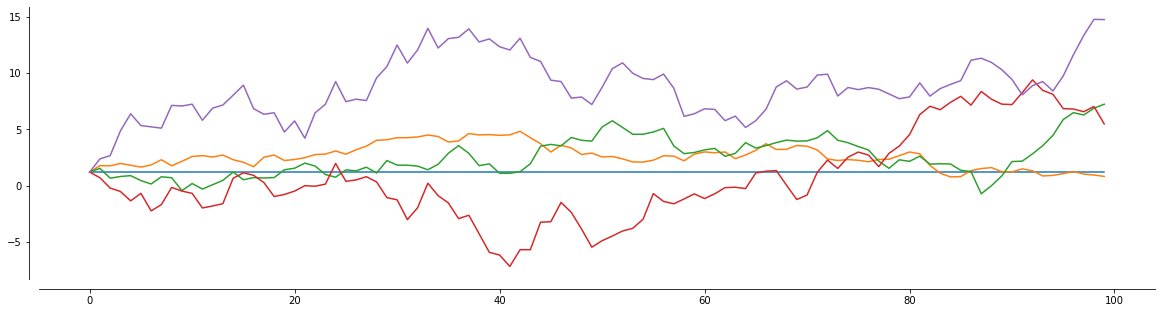

In [17]:
ts = utils.random_timeseries(1.2, 0.0, 100)
ts1 = utils.random_timeseries(1.2, 0.3, 100)
ts2 = utils.random_timeseries(1.2, 0.5, 100)
ts3 = utils.random_timeseries(1.2, 0.8, 100)
ts4 = utils.random_timeseries(1.2, 1, 100)
print(ts.shape)

fig,axs = plt.subplots(figsize=(20,5))
axs.plot(ts)
axs.plot(ts1)
axs.plot(ts2)
axs.plot(ts3)
axs.plot(ts4)
sns.despine(offset=10)


Use `LazyPlot` to plot a single timeseries

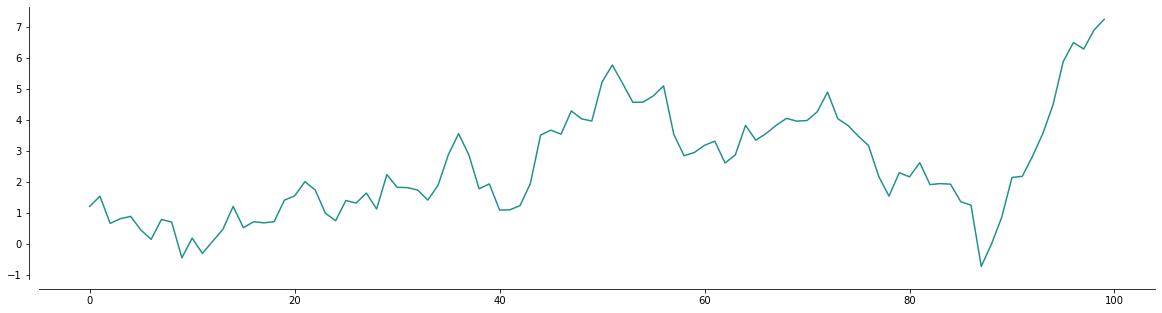

In [28]:
glm.LazyPlot(ts2, figsize=(20, 5))


Use `LazyPlot` to plot multiply timeseries

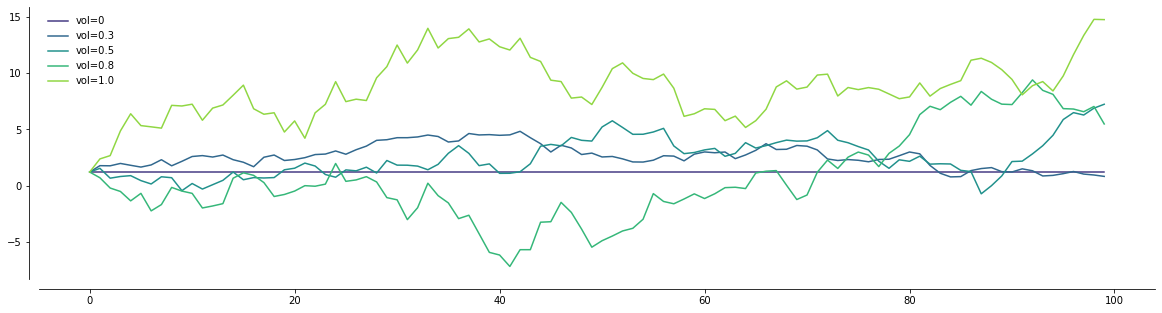

In [23]:
glm.LazyPlot([ts, ts1, ts2, ts3, ts4], 
             figsize=(20, 5), 
             save_as="/mnt/d/FSL/shared/spinoza/programs/project_repos/PlayGround/results/test_LazyPlot.pdf",
             labels=['vol=0', 'vol=0.3', 'vol=0.5', 'vol=0.8', 'vol=1.0'])


Add horizontal line

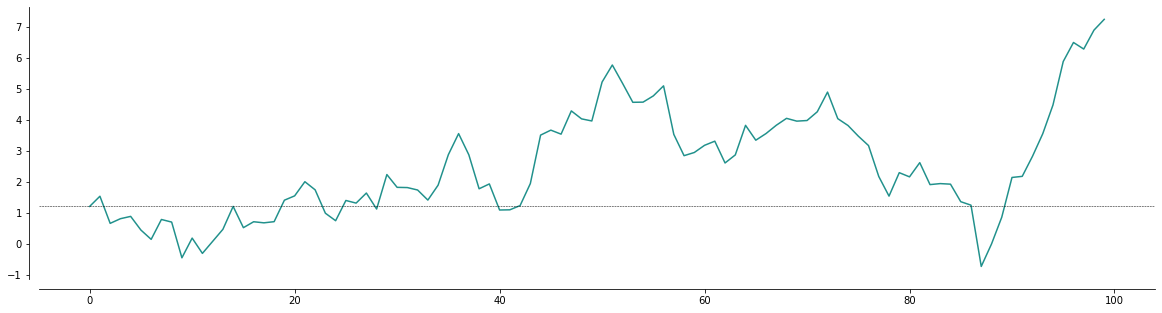

In [31]:
hline = {'pos': 1.2, 'color': 'k', 'lw': 0.5, 'ls': '--'}
glm.LazyPlot(ts2, figsize=(20, 5), add_hline=hline)


Add vertical line

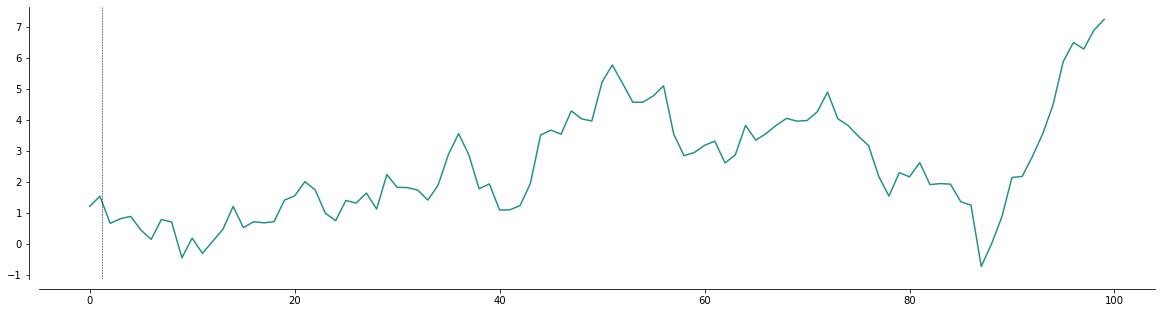

In [32]:
vline = {'pos': 1.2, 'color': 'k', 'lw': 0.5, 'ls': '--'}
glm.LazyPlot(ts2, figsize=(20, 5), add_vline=vline)


Add shaded error

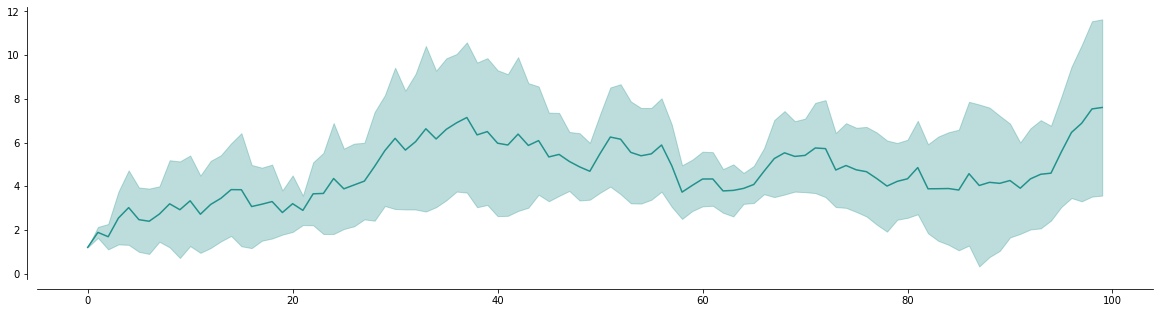

In [44]:
from scipy.stats import sem
stack = np.hstack((ts1[...,np.newaxis],ts2[...,np.newaxis],ts4[...,np.newaxis]))
avg = stack.mean(axis=-1)
err = sem(stack, axis=-1)
glm.LazyPlot(avg, figsize=(20, 5), error=err)